In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

D:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Shape of the dataset

In [ ]:
In this case study, we are going to work on the Netflix movies and TV shows dataset.
Our first task is to read the dataset and print the shape of the dataset.

In [2]:
df = pd.read_csv('netflix_dataset.csv')
print(df.shape)

(7787, 12)


# Describe the dataset

In [ ]:
Problem Statement:
Describe the dataset using the pandas describe API.

Output Format:
       release_year
count   7787.000000
mean    2013.932580
...

In [3]:
df = pd.read_csv('netflix_dataset.csv')
print(df.describe())

       release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000


# Datatype of each column

In [ ]:
Problem Statement:
Print the datatype of each column.

Output Format:
show_id         object
type            object
...

In [4]:
df = pd.read_csv('netflix_dataset.csv')
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


# Number of NA values in each column

In [ ]:
Problem Statement:
Print the number of NA values in each column.

Output Format:
type               0
title              0
director        2389
cast             718
...

In [8]:
df = pd.read_csv('netflix_dataset.csv')
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


# Remove NA values

In [ ]:
Problem Statement:
In the last problem we found out that there are some columns for which there are some NA values present. 
Now in this problem, our task is to remove the NA values and replace them with some meaningful data.

For each column with NA values, do the following:
For 'cast' and 'director' columns, replace NA values with 'No Data'.

As these have a large number of NA values present.
For the columns with 500 or fewer NA values present
Replace 'country', 'date_added' and 'rating' with the mode of the column. 
Now again print the number of NA values in each column. This time each column should have zero NA values present.

Output Format:
show_id         0
type            0
title           0
director        0
...

In [29]:
df = pd.read_csv('netflix_dataset.csv')

df['cast'].fillna('No Data',inplace=True)
df['director'].fillna('No Data',inplace=True)

country_mode = df['country'].mode().iloc[0]
date_added_mode = df['date_added'].mode().iloc[0]
rating_mode = df['rating'].mode().iloc[0]

df['country'].fillna(country_mode,inplace=True)
df['date_added'].fillna(date_added_mode,inplace=True)
df['rating'].fillna(rating_mode,inplace=True)

print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


# Percentage of TV shows and Movies

In [ ]:
Problem Statement:
Find and print the overall percentage of TV shows and Movies.

Steps to follow:
1. Create a pie chart showing the percentage of TV shows and Movies.
2. Print the output in the form of a tuple. (till one decimal point)

Output Format:
(<Percentage of Movies>, <Percentage of TV shows>)

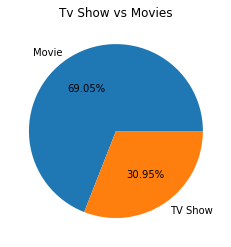

(69.1, 30.9)


In [42]:
df = pd.read_csv('netflix_dataset.csv')

type_series = df['type'].value_counts()

tv_show  = np.array(type_series.index)
count = np.array(type_series.values)

plt.title('Tv Show vs Movies')
plt.pie(count,labels=tv_show,autopct='%.2f%%')
plt.show()

# Count the number of movies and TV shows
movies_count = len(df[df['type']=='Movie'])
tv_shows_count = len(df[df['type']=='TV Show'])

# Calculate the percentages
total = movies_count+tv_shows_count
movies_percent = (movies_count/total)*100
tv_shows_percent = (tv_shows_count/total)*100

output = (round(movies_percent,1),round(tv_shows_percent,1))
print(output)

# Top 10 countries

In [ ]:
Problem Statement:
Using the bar plot, show the top 10 countries with the most content.

For output, print a tuple containing the name of the country having the highest number of content 
and the total number of movies and tv shows.

Output Format:
(<Top Country>, <Total content>)

In [50]:
df = pd.read_csv('netflix_dataset.csv')

country = df['country'].value_counts()
print((country.index[0],country.values[0]))

('United States', 2555)


# Content Added Over Years

In [ ]:
Problem Statement:
For the Netflix dataset, firstly create a bar chart for all the content added over the years. 
And the print the year having the most number of content added.

Output Format:
<year having most content added>

2019


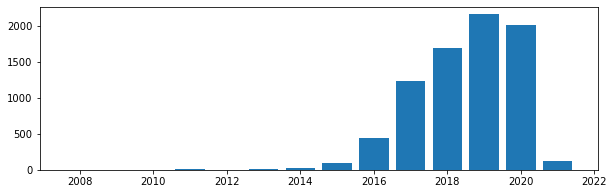

In [50]:
df = pd.read_csv('netflix_dataset.csv')

df["year"]=pd.DatetimeIndex(df["date_added"]).year
print(int(df["year"].value_counts().index[0]))

series = df["year"].value_counts()
x = np.array(series.index)
y = np.array(series.values)

plt.figure(figsize=(10,3))
plt.bar(x,y)
plt.show()

# Most Popular in India

In [ ]:
Problem Statement:
Find the most popular type of content in India. This popularity should be measured on two parameters:
1. What type of content is more popular, Movies or TV shows? (Plot Piechart to find this)

2. What type of rating is more popular. If it's teens or adults or kids. (Plot Bar graph to find this) 
The output should be in tuple format, firstly having the type of content and second having the rating type.

Output Format:
(<Content Type>, <Rating Type>)

In [61]:
df = pd.read_csv('netflix_dataset.csv')
india_df = df[df['country']=='India']
print((india_df['type'].value_counts().index[0],india_df['rating'].value_counts().index[0]))

('Movie', 'TV-14')


# Longest Movie Duration

In [ ]:
Problem Statement:
Print the title of the longest movie duration and in which year it was released.

Output Format:
(<Movie Title>, <Release Year>)

In [84]:
df = pd.read_csv('netflix_dataset.csv')
duration = df['duration']
run_duration = [] 
for i in duration:
    run_duration.append(int(i.split()[0]))
    
series = pd.Series(run_duration)
print((df['title'].loc[series.idxmax()],df['release_year'].loc[series.idxmax()]))

('Black Mirror: Bandersnatch', 2018)


('Black Mirror: Bandersnatch', 2018)


In [79]:
df.index

RangeIndex(start=0, stop=7787, step=1)

'Black Mirror: Bandersnatch'

2018